In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Load Excel file
WDI = "../data/cleanWDI.csv"
POP = "../data/changed_pop_religious_df.csv"
GDP = "GDP.csv"
Final = "../data/cleaned_pop_gdp_relig_df.csv"
df = pd.read_csv(Final)

In [33]:
df.shape

(3073, 17)

In [34]:
df.head()

,Unnamed: 0,name_x,name_y,name,alpha_2,iso_2,abb,year,population,pop,GDP,christian,islam,buddhist,judaism,nonrelig,other
0,0,Albania,Albania,Albania,AL,AL,ALB,1980,2708174,2670000,590.607738,0.304986,0.430895,0.0,0.000116,0.263191,0.000812
1,1,Albania,Albania,Albania,AL,AL,ALB,1981,2762658,2726022,663.294208,0.304300,0.429103,0.0,0.000113,0.264757,0.001007
2,2,Albania,Albania,Albania,AL,AL,ALB,1982,2818168,2782897,668.454504,0.302724,0.429109,0.0,0.000111,0.266176,0.001219
3,3,Albania,Albania,Albania,AL,AL,ALB,1983,2875647,2840461,661.546782,0.300816,0.429882,0.0,0.000108,0.267473,0.001460
4,4,Albania,Albania,Albania,AL,AL,ALB,1984,2934613,2898550,639.484730,0.299092,0.430471,0.0,0.000106,0.268670,0.001743


In [35]:
df.columns

Index(['Unnamed: 0', 'name_x', 'name_y', 'name', 'alpha_2', 'iso_2', 'abb',
       'year', 'population', 'pop', 'GDP', 'christian', 'islam', 'buddhist',
       'judaism', 'nonrelig', 'other'],
      dtype='object')

In [36]:
df =df.drop(columns=['Unnamed: 0','name_x','name_y','iso_2','abb'],errors='ignore')

In [37]:
df.head()

,name,alpha_2,year,population,pop,GDP,christian,islam,buddhist,judaism,nonrelig,other
0,Albania,AL,1980,2708174,2670000,590.607738,0.304986,0.430895,0.0,0.000116,0.263191,0.000812
1,Albania,AL,1981,2762658,2726022,663.294208,0.304300,0.429103,0.0,0.000113,0.264757,0.001007
2,Albania,AL,1982,2818168,2782897,668.454504,0.302724,0.429109,0.0,0.000111,0.266176,0.001219
3,Albania,AL,1983,2875647,2840461,661.546782,0.300816,0.429882,0.0,0.000108,0.267473,0.001460
4,Albania,AL,1984,2934613,2898550,639.484730,0.299092,0.430471,0.0,0.000106,0.268670,0.001743


In [38]:
df = df.rename(columns={
    "name": "country",
    "alpha_2": "country_code",
    "population": "population",
    "pop": "population_alt",
    "GDP": "gdp"
})

In [39]:
df.head()

,country,country_code,year,population,population_alt,gdp,christian,islam,buddhist,judaism,nonrelig,other
0,Albania,AL,1980,2708174,2670000,590.607738,0.304986,0.430895,0.0,0.000116,0.263191,0.000812
1,Albania,AL,1981,2762658,2726022,663.294208,0.304300,0.429103,0.0,0.000113,0.264757,0.001007
2,Albania,AL,1982,2818168,2782897,668.454504,0.302724,0.429109,0.0,0.000111,0.266176,0.001219
3,Albania,AL,1983,2875647,2840461,661.546782,0.300816,0.429882,0.0,0.000108,0.267473,0.001460
4,Albania,AL,1984,2934613,2898550,639.484730,0.299092,0.430471,0.0,0.000106,0.268670,0.001743


In [40]:
if "population_alt" in df.columns:
    df = df.drop(columns=["population_alt"])


In [41]:
df.head()

,country,country_code,year,population,gdp,christian,islam,buddhist,judaism,nonrelig,other
0,Albania,AL,1980,2708174,590.607738,0.304986,0.430895,0.0,0.000116,0.263191,0.000812
1,Albania,AL,1981,2762658,663.294208,0.304300,0.429103,0.0,0.000113,0.264757,0.001007
2,Albania,AL,1982,2818168,668.454504,0.302724,0.429109,0.0,0.000111,0.266176,0.001219
3,Albania,AL,1983,2875647,661.546782,0.300816,0.429882,0.0,0.000108,0.267473,0.001460
4,Albania,AL,1984,2934613,639.484730,0.299092,0.430471,0.0,0.000106,0.268670,0.001743


In [42]:
print("Number of countries:", df["country"].nunique())
print("Year range:", df["year"].min(), "to", df["year"].max())

Number of countries: 64
Year range: 1960 to 2010


In [43]:
df.to_csv('cleaned.csv', index=False)

Population growth of (Albania)

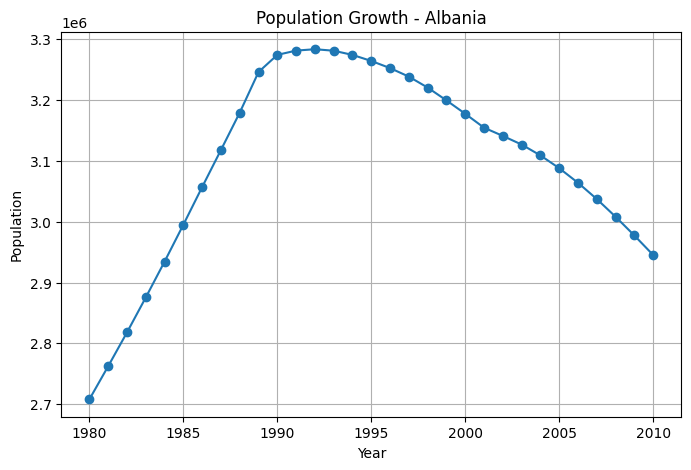

In [18]:
albania = df[df["country"] == "Albania"]
plt.figure(figsize=(8,5))
plt.plot(albania["year"], albania["population"], marker="o")
plt.title("Population Growth - Albania")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.show()

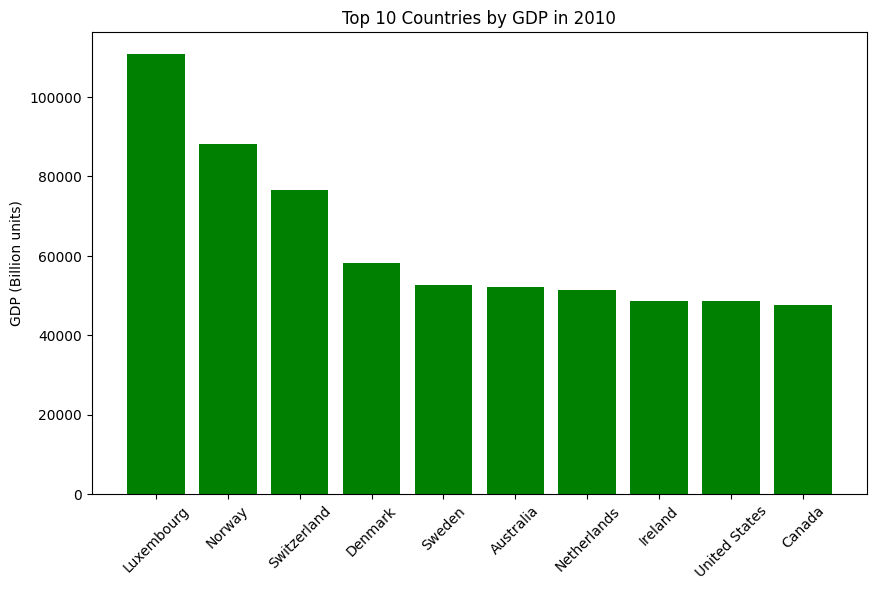

In [ ]:
top_gdp_2010 = df[df["year"] == 2010].sort_values("gdp", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_gdp_2010["country"], top_gdp_2010["gdp"]1e9, color="green")
plt.title("Top 10 Countries by GDP in 2010")
plt.ylabel("GDP (Billion units)")
plt.xticks(rotation=45)
plt.show()


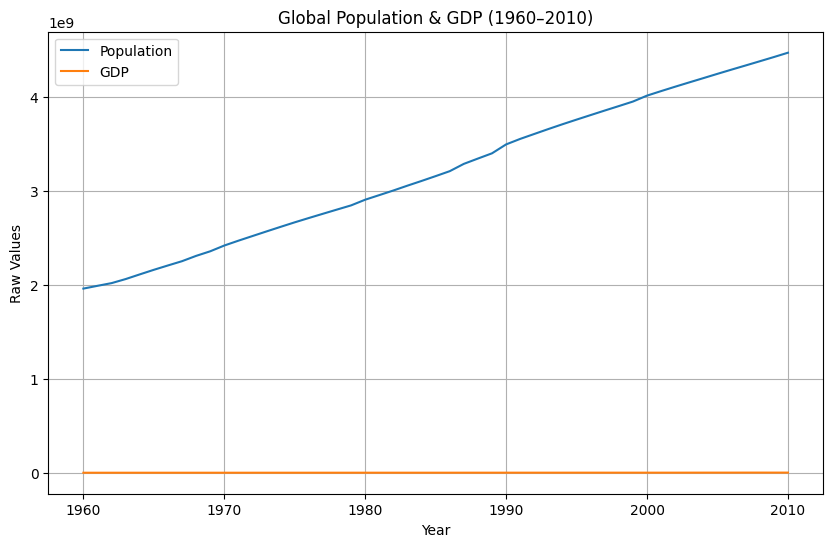

In [30]:
# Global population & GDP over time (raw numbers)
global_stats = df.groupby("year")[["population", "gdp"]].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(global_stats["year"], global_stats["population"], label="Population")
plt.plot(global_stats["year"], global_stats["gdp"], label="GDP")
plt.title("Global Population & GDP (1960–2010)")
plt.xlabel("Year")
plt.ylabel("Raw Values")
plt.legend()
plt.grid(True)
plt.show()
